In [1]:
using JLD2, CairoMakie
using StatsBase, FreqTables
using Jchemo, JchemoData

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/forages2.jld2")
@load db dat
pnames(dat)

(:X, :Y)

In [3]:
X = dat.X
Y = dat.Y
ntot = nro(X)

485

In [4]:
@head X

... (485, 700)
 


Row,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,1188,1190,1192,1194,1196,1198,1200,1202,1204,1206,1208,1210,1212,1214,1216,1218,1220,1222,1224,1226,1228,1230,1232,1234,1236,1238,1240,1242,1244,1246,1248,1250,1252,1254,1256,1258,1260,1262,1264,1266,1268,1270,1272,1274,1276,1278,1280,1282,1284,1286,1288,1290,1292,1294,1296,1298,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.000231591,-0.000175945,-8.48176e-5,2.05217e-5,0.000110094,0.000161757,0.000154953,0.000163754,0.000187602,0.00021499,0.000242479,0.000265498,0.000282141,0.000281442,0.000271025,0.000261075,0.000257284,0.000252177,0.00024293,0.000228295,0.000219097,0.000214136,0.000215612,0.000218982,0.000228004,0.000236081,0.000236017,0.000220327,0.000187096,0.000137138,7.68593e-5,1.13679e-5,-5.00951e-5,-9.54664e-5,-0.000119199,-0.000131897,-0.000142349,-0.000161489,-0.00019387,-0.000244808,-0.000303259,-0.000366904,-0.000416738,-0.000451535,-0.00046995,-0.000478637,-0.000477348,-0.000478142,-0.000476719,-0.000479701,-0.000482037,-0.000496769,-0.000511959,-0.000532094,-0.000542661,-0.000540188,-0.000512715,-0.00045798,-0.000370395,-0.000256256,-0.000126907,1.13716e-6,0.000119047,0.000212745,0.000275685,0.000307863,0.000313547,0.000296977,0.000269661,0.000247818,0.000233944,0.000228773,0.000224567,0.000221256,0.000218893,0.000217741,0.000210144,0.00019664,0.000181949,0.000169774,0.000151691,0.00012385,9.23378e-5,5.9959e-5,2.58352e-5,-4.77314e-6,-3.21835e-5,-5.53154e-5,-6.71707e-5,-6.54166e-5,-5.16448e-5,-2.43366e-5,1.12255e-5,4.68917e-5,7.773e-5,0.000106785,0.000133173,0.000153607,0.000168518,0.000182591,⋯
2,-9.66352e-5,-3.30928e-5,5.64966e-5,0.000154135,0.000237725,0.000295789,0.000319587,0.000357405,0.000404611,0.000447996,0.000479786,0.000488339,0.000465929,0.000402301,0.000313648,0.000220226,0.000138483,7.35084e-5,3.50018e-5,2.83293e-5,6.05478e-5,0.000118272,0.000187726,0.000249842,0.00029697,0.000315062,0.000298828,0.000251643,0.000187055,0.000118243,5.60849e-5,3.8727e-6,-3.28778e-5,-4.84688e-5,-4.38912e-5,-3.34954e-5,-2.72637e-5,-3.65483e-5,-6.62949e-5,-0.000121833,-0.000193587,-0.000280244,-0.000362132,-0.000434981,-0.000494461,-0.000546531,-0.000590606,-0.000638514,-0.000684688,-0.000734688,-0.000783664,-0.000842714,-0.000892596,-0.000930301,-0.000938118,-0.000913585,-0.000846217,-0.000737781,-0.000588122,-0.000410395,-0.000220611,-3.69382e-5,0.000131072,0.000266078,0.000358377,0.000408684,0.000424528,0.000412147,0.000383896,0.000357957,0.000338385,0.000326749,0.000315572,0.00030542,0.000293671,0.000280005,0.000259482,0.000233697,0.0002044,0.000177199,0.000147989,0.000112325,7.33317e-5,3.48779e-5,-2.5229e-6,-3.27922e-5,-5.52233e-5,-7.06412e-5,-7.49675e-5,-6.44041e-5,-4.04393e-5,-6.50489e-6,3.09196e-5,6.87358e-5,0.000105202,0.000142313,0.000177182,0.000206652,0.000230788,0.000253703,⋯
3,-0.000131769,-7.8398e-5,7.92223e-7,8.90044e-5,0.000160022,0.000198435,0.000196598,0.000212225,0.000241109,0.000271235,0.000301045,0.000324921,0.000337619,0.000325857,0.00029979,0.000277167,0.00027018,0.00027165,0.000277606,0.000287722,0.000308203,0.000324847,0.000328

In [5]:
@head Y

... (485, 4)
 


Row,dm,ndf,typ,test
,Float64?,Float64?,String,Int64
1,92.23,37.58,Legume forages,1
2,93.26,49.6462,Legume forages,0
3,92.9,63.2939,Forage trees,0


In [6]:
y = Y.typ
tab(y)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "Cereal and grass forages" => 160
  "Forage trees"             => 101
  "Legume forages"           => 224

In [7]:
test = Y.test
tab(test)

OrderedCollections.OrderedDict{Int64, Int64} with 2 entries:
  0 => 323
  1 => 162

In [8]:
freqtable(y, test)

3×2 Named Matrix{Int64}
             Dim1 ╲ Dim2 │   0    1
─────────────────────────┼─────────
Cereal and grass forages │ 100   60
Forage trees             │  56   45
Legume forages           │ 167   57

In [9]:
wl = names(X)
wl_num = parse.(Float64, wl)

700-element Vector{Float64}:
 1100.0
 1102.0
 1104.0
 1106.0
 1108.0
 1110.0
 1112.0
 1114.0
 1116.0
 1118.0
    ⋮
 2482.0
 2484.0
 2486.0
 2488.0
 2490.0
 2492.0
 2494.0
 2496.0
 2498.0

Tot ==> Train + Test

In [10]:
s = Bool.(test)
Xtrain = rmrow(X, s)
Ytrain = rmrow(Y, s)
Xtest = X[s, :]
Ytest = Y[s, :]
ntrain = nro(Xtrain)
ntest = nro(Xtest)
(ntot = ntot, ntrain, ntest)

(ntot = 485, ntrain = 323, ntest = 162)

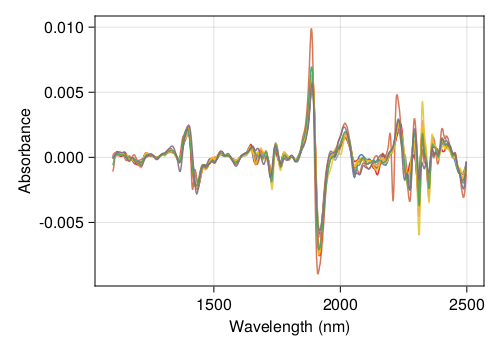

In [11]:
# Spectra X
# (already pre-processed SavGol(Snv; f = 21, p = 3, d=2))
plotsp(X, wl_num; nsamp = 10,
    xlabel = "Wavelength (nm)", ylabel = "Absorbance").f

In [12]:
#### PCAs on X
fm = pcasvd(X; nlv = 15) ;
pnames(fm)

(:T, :P, :sv, :xmeans, :xscales, :weights, :niter)

In [13]:
T = fm.T
@head T

... (485, 15)
 


3×15 Matrix{Float64}:
 0.00834634  0.00363568   0.00170398  …  -0.000683722  0.000232643
 0.00606996  0.00662804  -0.0061067       0.00115751   7.01344e-5
 0.00332097  0.00701649  -0.00734718      0.000111532  0.000839883

In [14]:
res = summary(fm, X) ;
pnames(res)

(:explvarx, :contr_ind, :contr_var, :coord_var, :cor_circle)

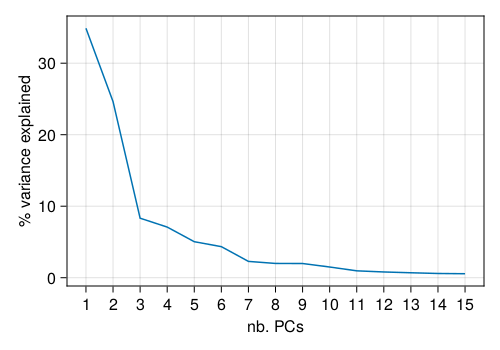

In [15]:
z = res.explvarx
plotgrid(z.lv, 100 * z.pvar; step = 1,
    xlabel = "nb. PCs", ylabel = "% variance explained").f

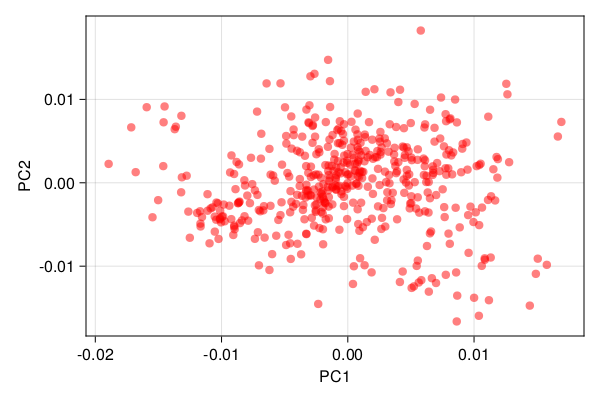

In [16]:
i = 1
plotxy(T[:, i:(i + 1)]; color = (:red, .5),
    xlabel = "PC1", ylabel = "PC2").f

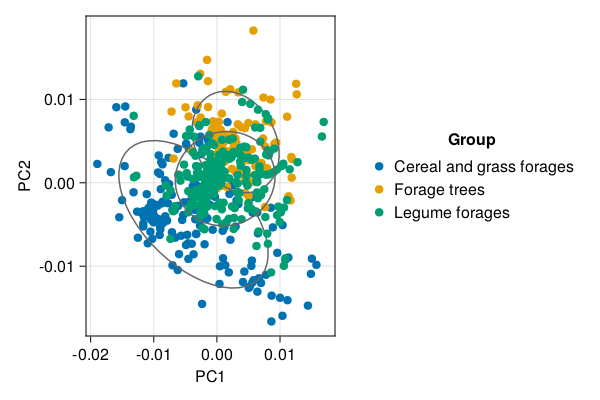

In [17]:
plotxy(T[:, i:(i + 1)], y; ellipse = true,
    xlabel = "PC1", ylabel = "PC2").f

In [18]:
# Train vs Test
fm = pcasvd(Xtrain, nlv = 15) ;
Ttrain = fm.T
@head Ttrain

... (323, 15)
 


3×15 Matrix{Float64}:
 -0.00669306  -0.00650046  -0.00570717  …   0.000183244  -0.0013255
 -0.00387969  -0.0068879   -0.00728328      0.000488912   0.000484785
  0.0022825    0.00305238   0.00109557     -0.000652965  -0.000364058

In [19]:
Ttest = Jchemo.transform(fm, Xtest)

162×15 Matrix{Float64}:
 -0.00881891   -0.00355513    0.00143197   …  -0.000347708   0.000613944
  0.00647425    0.00296032   -0.000761146      0.000105057  -0.000415429
  0.00351213    0.000177464  -0.000182268     -0.000108081  -0.000860368
 -0.00472118   -0.000598134   0.003952         0.00103712   -0.000434681
  0.00795236    0.00363739   -0.000703396     -0.00111074   -0.00100708
  0.0103509     0.003657     -0.00463993   …  -0.00030368   -0.000140056
 -0.0108121    -0.00169825   -0.00827559       0.00145345   -0.000857756
 -0.00131378   -0.0045166    -0.000531412     -0.000659472  -0.00278657
  0.00554338   -0.0124391    -0.00464596      -0.000714475  -0.00044114
 -0.00345204   -0.00529883   -0.00268587       0.00023191   -0.000666528
  ⋮                                        ⋱                
  0.00883251   -0.00177362    0.00385053       0.00107504   -0.000220709
  0.0142099    -0.00255327   -0.00133155       0.000770994   0.000421192
 -0.000794619  -0.00448094    0.000391724 

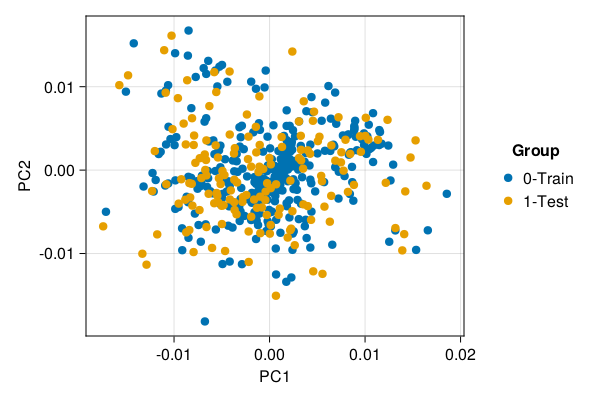

In [20]:
zT = vcat(Ttrain, Ttest)
group = vcat(repeat(["0-Train";], ntrain), repeat(["1-Test";], ntest))
i = 1
plotxy(zT[:, i:(i + 1)], group;
    xlabel = "PC1", ylabel = "PC2").f

In [21]:
res_sd = occsd(fm) ;
pnames(res_sd)

(:d, :fm, :Sinv, :e_cdf, :cutoff, :nlv)

In [22]:
sdtrain = res_sd.d

Row,d,dstand,pval,gh
,Float64,Float64,Float64,Float64
1,4.15084,0.599839,0.275542,1.14863
2,3.3236,0.480295,0.452012,0.736422
3,2.83058,0.409049,0.588235,0.534147
4,4.72863,0.683336,0.179567,1.49066
5,5.77737,0.834891,0.0804954,2.2252
6,3.44477,0.497804,0.411765,0.791094
7,2.90469,0.419758,0.563467,0.562481
8,3.56771,0.515571,0.393189,0.84857
9,5.22924,0.75568,0.117647,1.823


In [23]:
sdtest = Jchemo.predict(res_sd, Xtest).d

Row,d,dstand,pval,gh
,Float64,Float64,Float64,Float64
1,3.20671,0.463403,0.47678,0.685533
2,2.78016,0.401762,0.622291,0.515285
3,4.27462,0.617727,0.256966,1.21816
4,5.62454,0.812804,0.0928793,2.10903
5,4.90598,0.708966,0.164087,1.60458
6,2.64618,0.382401,0.671827,0.466819
7,4.77916,0.690639,0.173375,1.52269
8,4.81057,0.695177,0.170279,1.54277
9,6.93314,1.00191,0.0402477,3.20456


In [24]:
res_od = occod(fm, Xtrain) ;
pnames(res_od)

(:d, :fm, :e_cdf, :cutoff, :nlv)

In [25]:
odtrain = res_od.d

Row,d,dstand,pval
,Float64,Float64,Float64
1,0.00255815,0.632794,0.195046
2,0.00227594,0.562983,0.278638
3,0.00189998,0.469986,0.402477
4,0.00339056,0.838701,0.0681115
5,0.00374907,0.927383,0.0402477
6,0.00229379,0.5674,0.266254
7,0.00209647,0.518591,0.331269
8,0.00206131,0.509893,0.346749
9,0.00212659,0.526042,0.321981


In [26]:
odtest = Jchemo.predict(res_od, Xtest).d

Row,d,dstand,pval
,Float64,Float64,Float64
1,0.00170103,0.420773,0.489164
2,0.00186494,0.461318,0.417957
3,0.00264352,0.653911,0.182663
4,0.00493003,1.21951,0.00928793
5,0.00226936,0.561358,0.281734
6,0.00157017,0.388403,0.563467
7,0.0026161,0.647129,0.188854
8,0.00447097,1.10596,0.0154799
9,0.00310203,0.767329,0.0990712


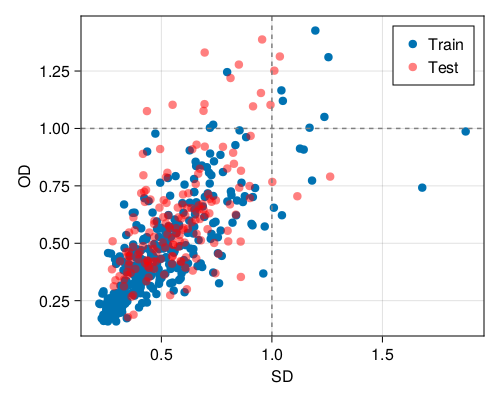

In [27]:
f = Figure(resolution = (500, 400))
ax = Axis(f, xlabel = "SD", ylabel = "OD")
scatter!(ax, sdtrain.dstand, odtrain.dstand, label = "Train")
scatter!(ax, sdtest.dstand, odtest.dstand, color = (:red, .5), label = "Test")
hlines!(ax, 1; color = :grey, linestyle = "-")
vlines!(ax, 1; color = :grey, linestyle = "-")
axislegend(position = :rt)
f[1, 1] = ax
f

In [28]:
zres = res_sd ; nam = "SD"
#zres = res_od ; nam = "OD"
sdtrain = zres.d

Row,d,dstand,pval,gh
,Float64,Float64,Float64,Float64
1,4.15084,0.599839,0.275542,1.14863
2,3.3236,0.480295,0.452012,0.736422
3,2.83058,0.409049,0.588235,0.534147
4,4.72863,0.683336,0.179567,1.49066
5,5.77737,0.834891,0.0804954,2.2252
6,3.44477,0.497804,0.411765,0.791094
7,2.90469,0.419758,0.563467,0.562481
8,3.56771,0.515571,0.393189,0.84857
9,5.22924,0.75568,0.117647,1.823


In [29]:
sdtest = Jchemo.predict(zres, Xtest).d

Row,d,dstand,pval,gh
,Float64,Float64,Float64,Float64
1,3.20671,0.463403,0.47678,0.685533
2,2.78016,0.401762,0.622291,0.515285
3,4.27462,0.617727,0.256966,1.21816
4,5.62454,0.812804,0.0928793,2.10903
5,4.90598,0.708966,0.164087,1.60458
6,2.64618,0.382401,0.671827,0.466819
7,4.77916,0.690639,0.173375,1.52269
8,4.81057,0.695177,0.170279,1.54277
9,6.93314,1.00191,0.0402477,3.20456


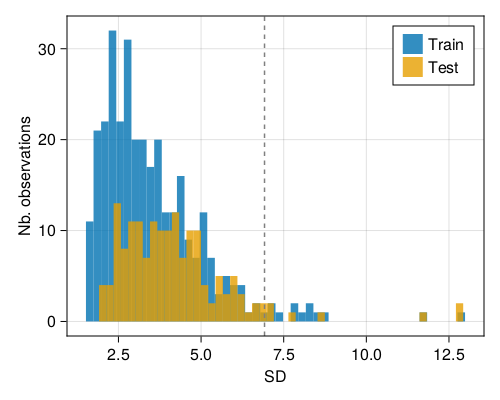

In [30]:
f = Figure(resolution = (500, 400))
ax = Axis(f, xlabel = nam, ylabel = "Nb. observations")
hist!(ax, sdtrain.d; bins = 50, label = "Train")
hist!(ax, sdtest.d; bins = 50, label = "Test")
vlines!(ax, zres.cutoff; color = :grey, linestyle = "-")
axislegend(position = :rt)
f[1, 1] = ax
f

In [31]:
# Variable y
summ(Y)

(res = 4×7 DataFrame
 Row │ variable  mean    std     min                       max             n   ⋯
     │ Symbol    Union…  Union…  Any                       Any             Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ dm        92.1    1.988   80.903                    96.27             4 ⋯
   2 │ ndf       50.736  13.204  18.425                    85.7235           4
   3 │ typ                       Cereal and grass forages  Legume forages    4
   4 │ test      0.334   0.472   0                         1                 4
                                                               2 columns omitted, ntot = 485)

In [32]:
summ(Y, test)

Group: 0
4×7 DataFrame
 Row │ variable  mean    std     min                       max             n      nmissing
     │ Symbol    Union…  Union…  Any                       Any             Int64  Int64
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │ dm        92.022  1.992   84.25                     96.27             323         0
   2 │ ndf       50.988  13.036  18.425                    83.3012           323         0
   3 │ typ                       Cereal and grass forages  Legume forages    323         0
   4 │ test      0.0     0.0     0                         0                 323         0


Group: 1
4×7 DataFrame
 Row │ variable  mean    std     min                       max             n      nmissing
     │ Symbol    Union…  Union…  Any                       Any             Int64  Int64
─────┼─────────────────────────────────────────────────────────────────────────────────────
   1 │ dm        92.257  1.976   80.903       

In [33]:
nam = "ndf"
#nam = "dm"
aggstat(Y[:, nam], test; fun = mean).X

2×1 Matrix{Union{Missing, Float64}}:
 50.98823452524704
 50.23342525793248

In [34]:
aggstat(Y; vars = nam, groups = :test)

Row,test,ndf
,Int64,Float64
1,0,50.9882
2,1,50.2334


In [35]:
y = Float64.(Y[:, nam])  # To remove type "Missing" for the given variable
s = Bool.(test)
ytrain = rmrow(y, s)
ytest = y[s]

162-element Vector{Float64}:
 37.579963135639154
 56.99851095511593
 47.21391972672929
 25.309323906319047
 54.28931875525652
 80.29120067524794
 57.55875502858353
 32.66967330326697
 61.936710276193665
 46.46783498421683
  ⋮
 48.90913691567336
 69.05194981637266
 45.154438712841326
 41.50911821540868
 52.42695116229647
 22.959435724677174
 35.71112405578161
 55.53583902046241
 34.64568924391239

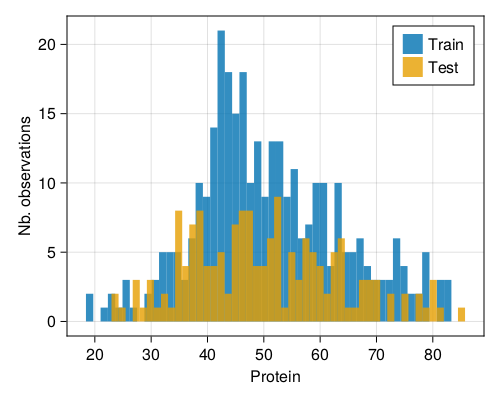

In [36]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = "Protein", ylabel = "Nb. observations")
hist!(ax, ytrain; bins = 50, label = "Train")
hist!(ax, ytest; bins = 50, label = "Test")
axislegend(position = :rt)
f

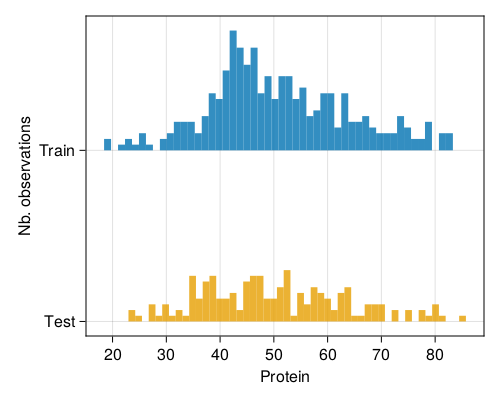

In [37]:
f = Figure(resolution = (500, 400))
offs = [30; 0]
ax = Axis(f[1, 1], xlabel = "Protein",
    ylabel = "Nb. observations",
    yticks = (offs, ["Train" ; "Test"]))
hist!(ax, ytrain; offset = offs[1], bins = 50)
hist!(ax, ytest; offset = offs[2], bins = 50)
f

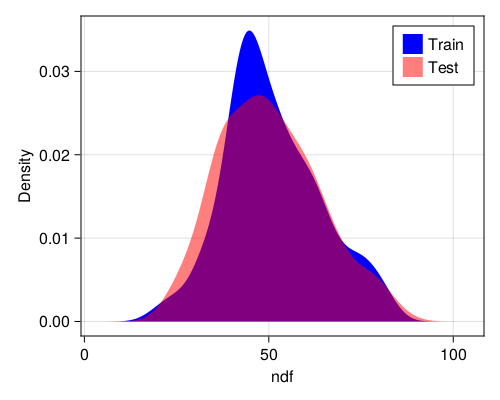

In [38]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = nam, ylabel = "Density")
density!(ax, ytrain; color = :blue, label = "Train")
density!(ax, ytest; color = (:red, .5), label = "Test")
axislegend(position = :rt)
f

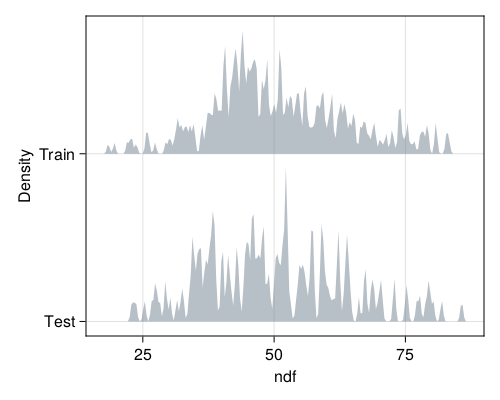

In [39]:
f = Figure(resolution = (500, 400))
offs = [.08; 0]
ax = Axis(f[1, 1], xlabel = nam, ylabel = "Density",
    yticks = (offs, ["Train" ; "Test"]))
density!(ax, ytrain; offset = offs[1], color = (:slategray, 0.5),
    bandwidth = 0.2)
density!(ax, ytest; offset = offs[2], color = (:slategray, 0.5),
    bandwidth = 0.2)
f

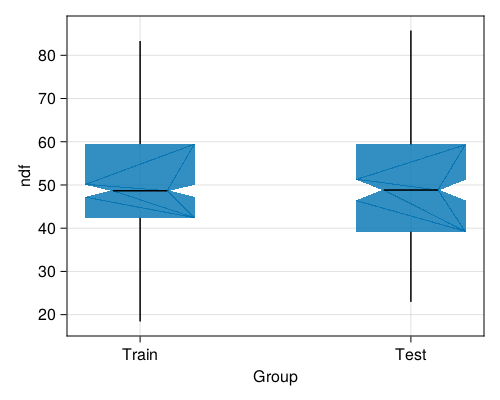

In [40]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1],
    xticks = (0:1, ["Train", "Test"]),
    xlabel = "Group", ylabel = nam)
boxplot!(ax, test, y; width = .5,
    show_notch = true)
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*